In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
path = 'F:\DOCUMENTOS ALEJANDRO\MASTERMIND\Mastermind\DATA\GITHUB\Projects\Linear_regresion\Final_project\CarPrice_Assignment.csv'

df= pd.read_csv(path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- 1	Car_ID	Unique id of each observation (Interger)
- 2	Symboling	Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)
- 3	carCompany	Name of car company (Categorical)
- 4	fueltype	Car fuel type i.e gas or diesel (Categorical)
- 5	aspiration	Aspiration used in a car (Categorical) (Std o Turbo)
- 6	doornumber	Number of doors in a car (Categorical). Puertas
- 7	carbody	body of car (Categorical). (convertible, sedan, wagon …)
- 8	drivewheel	type of drive wheel (Categorical). (hidráulica, manual, )
- 9	enginelocation	Location of car engine (Categorical). Lugar del motor
- 10 wheelbase	Weelbase of car (Numeric). Distancia de ejes en pulgadas.
- 11 carlength	Length of car (Numeric). Longitud
- 12 carwidth	Width of car (Numeric). Amplitud
- 13 carheight	height of car (Numeric). Altura
- 14 curbweight	The weight of a car without occupants or baggage. (Numeric). Peso del auto
- 15 enginetype	Type of engine. (Categorical). Tipo de motor
- 16 cylindernumber	cylinder placed in the car (Categorical). Cilindraje
- 17 enginesize	Size of car (Numeric). Tamaño del carro en …
- 18 fuelsystem	Fuel system of car (Categorical)
- 19 boreratio	Boreratio of car (Numeric). Eficiencia de motor
- 20 troke	Stroke or volume inside the engine (Numeric). Pistones, tiempos, combustión
- 21 compressionratio	compression ratio of car (Numeric). Comprensión o medición de presión en motor
- 22 horsepower	Horsepower (Numeric). Poder del carro
- 23 peakrpm	car peak rpm (Numeric). Picos de revoluciones por minuto
- 24 citympg	Mileage in city (Numeric). Consumo de gasolina
- 25 highwaympg	Mileage on highway (Numeric). Consumo de gasolina
- 26 price

# 1. Data analysis and manipulation

In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
df.drop(["car_ID", "symboling", "drivewheel", "wheelbase"], axis=1, inplace=True)

In [8]:
df.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'enginelocation', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [9]:
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,enginelocation,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,front,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,front,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,front,171.2,65.5,52.4,2823,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,front,176.6,66.2,54.3,2337,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,front,176.6,66.4,54.3,2824,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


- Voy a extraer el nombre de la marca y definirlo en una nueva columna. Quiero hacer mis predicciones en función de la marca y las características del coche, por lo que el modelo no lo voy a tener en cuenta para resolver este proyecto.

In [10]:
df['CarName'] = df['CarName'].str.split().str[0]

In [11]:
df.rename(columns = {'CarName':'brand'}, inplace = True)

- Comprobamos si hay algun NaN

In [12]:
df.isnull().any()

brand               False
fueltype            False
aspiration          False
doornumber          False
carbody             False
enginelocation      False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

## Encoding de los registros del tipo string

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    object 
 11  cylindernumber    205 non-null    object 
 12  enginesize        205 non-null    int64  
 13  fuelsystem        205 non-null    object 
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

In [14]:
le = LabelEncoder()

In [15]:
df['brand'] = le.fit_transform(df['brand'])
df['fueltype'] = le.fit_transform(df['fueltype']) 
df['aspiration'] = le.fit_transform(df['aspiration']) 
df['doornumber'] = le.fit_transform(df['doornumber']) 
df['carbody'] = le.fit_transform(df['carbody']) 
df['enginelocation'] = le.fit_transform(df['enginelocation']) 
df['enginetype'] = le.fit_transform(df['enginetype'])
df['cylindernumber'] = le.fit_transform(df['cylindernumber']) 
df['fuelsystem'] = le.fit_transform(df['fuelsystem'])

In [16]:
#columns_to_encode = ['brand', 'fueltype', 'aspiration', 'doornumber', 'carbody', 
#                     'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

#for column in columns_to_encode:
    #df[column] = le.fit_transform(df[column])

In [19]:
df.head()

,brand,fueltype,aspiration,doornumber,carbody,enginelocation,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1,0,1,0,0,168.8,64.1,48.8,2548,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,1,0,1,0,0,168.8,64.1,48.8,2548,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,0,171.2,65.5,52.4,2823,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,0,176.6,66.2,54.3,2337,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,176.6,66.4,54.3,2824,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


## Scaling de los registros de tipo numérico

In [23]:
df.columns

Index(['brand', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'enginelocation', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [24]:
s_sc = StandardScaler()

df[['carlength', 'carwidth', 'carheight', 'curbweight', 
    'cylindernumber', 'enginesize', 'boreratio','stroke', 
    'compressionratio', 'horsepower', 'peakrpm', 'citympg',
    'highwaympg']] =  s_sc.fit_transform(df[['carlength', 'carwidth', 'carheight', 'curbweight', 
    'cylindernumber', 'enginesize', 'boreratio','stroke', 
    'compressionratio', 'horsepower', 'peakrpm', 'citympg',
    'highwaympg']])

In [25]:
df.sample(10)

,brand,fueltype,aspiration,doornumber,carbody,enginelocation,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
39,7,1,0,0,3,0,0.109752,-0.330755,0.153893,-0.484331,...,-0.407003,0,-0.665314,1.037573,-0.288349,-0.459269,1.418345,0.272823,0.327351,8845.0
168,22,1,0,1,1,0,0.174754,-0.143836,-0.707626,-0.037669,...,0.459611,5,1.074252,0.781845,-0.212636,0.301233,-0.683286,-0.186865,-0.109354,9639.0
120,16,1,0,0,2,0,-1.360937,-0.984972,-1.281972,-1.133146,...,-0.888455,1,-1.331531,-0.081241,-0.187398,-0.915571,0.787855,0.885740,1.055193,6229.0
134,20,1,0,1,2,0,1.019791,0.276731,0.974387,0.291551,...,-0.142204,5,-2.923049,-3.789311,-0.212636,0.149133,0.262448,-0.646553,-0.400490,15040.0
78,13,1,0,1,2,0,-1.360937,-0.704593,-1.199923,-1.061911,...,-0.840310,1,-1.331531,-0.081241,-0.187398,-0.915571,0.787855,0.885740,1.055193,6669.0
66,11,0,0,0,3,0,0.077250,0.089812,0.276967,0.278074,...,0.170739,3,0.371023,1.229370,2.992540,-0.814171,-1.944265,0.885740,1.200761,18344.0
148,21,1,0,0,4,0,-0.036505,-0.237296,0.482090,-0.261000,...,-0.455148,1,1.074252,-1.967242,-0.288349,-0.560670,-0.683286,-0.340094,-0.254922,8013.0
193,25,1,0,0,4,0,0.735404,0.463650,0.564140,0.014313,...,-0.431076,5,-0.517266,0.462183,-0.288349,-0.408569,0.787855,-0.033636,0.036215,12290.0
126,17,1,0,1,1,1,-0.418396,-0.424215,-0.871725,0.385889,...,1.615095,5,1.518397,-1.136123,-0.162161,2.608091,1.628508,-1.259470,-0.837195,32528.0
31,7,1,0,1,2,0,-2.392856,-0.938242,-1.199923,-1.418085,...,-0.840310,0,-1.553603,0.494149,-0.237874,-0.712770,1.838671,0.885740,1.055193,6855.0


# 2. Explore

In [48]:
pd.plotting.scatter_matrix(df, figsize=(16, 9));

In [47]:
import matplotlib.pyplot as plt
import numpy as np

corr = df.corr()

sns.heatmap(corr)

<Axes: >

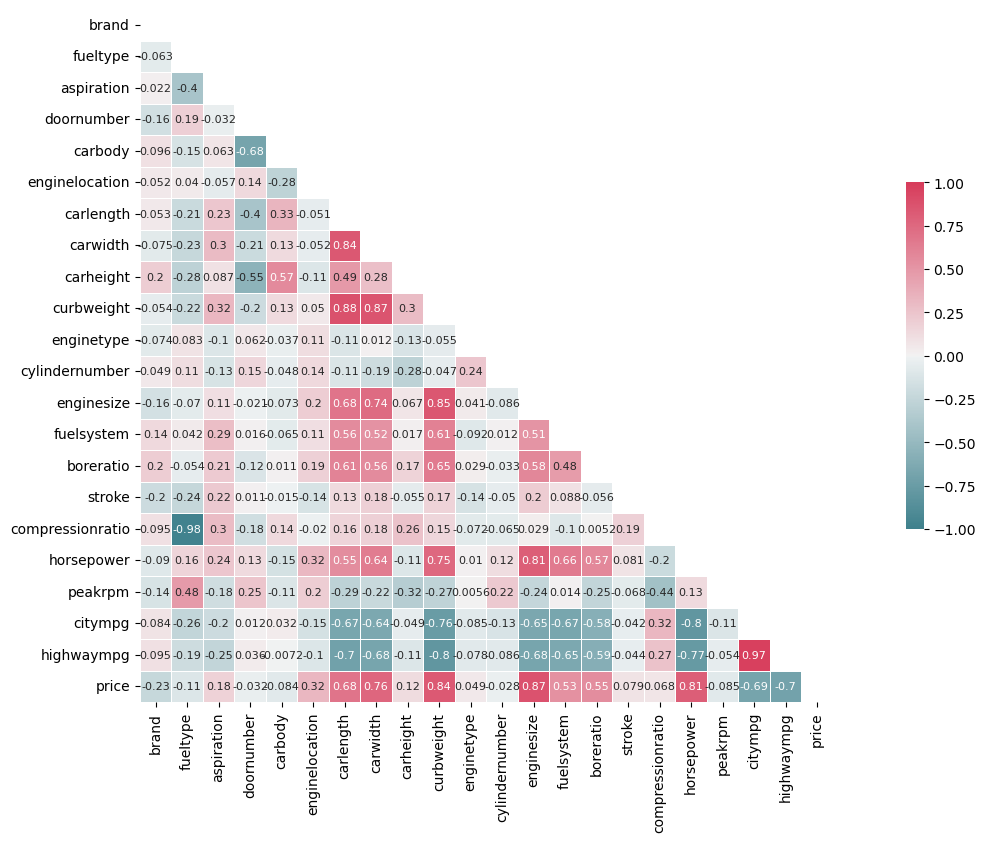

In [50]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool)) # np.triu devuelve un array con los valores del triángulo superior de otro array de 2 dimensiones

fig = plt.figure(figsize=(19, 9))

cmap = sns.diverging_palette(210, 5, as_cmap=True) # Para indicar los colores de nuestro heatmap

sns.heatmap(corr, mask = mask, cmap = cmap,
            vmax = 1, vmin = -1, center = 0,
            annot = True, annot_kws={"size": 8},
            square = True, linewidths = .5,
            cbar_kws = {"shrink": .5} # Comprimir la barra de la leyenda para ver mejor a que color corresponde cada valor
            )

plt.show()

 - Como era de esperar, se puede observar que existe una fuerte relación entre el tamaño del coche y el precio. Sin embargo, y como también se esperaba, el número de caballos tiene una gran influencia sobre el percio.
 - Por otra parte, se observa que el brand (marca de los coches) no tiene mucha correlación con el precio, lo cual a priori no parece tener mucho sentido. 

# 3. Model

In [52]:
df.columns

Index(['brand', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'enginelocation', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [53]:
X = df[['brand', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'enginelocation', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg']]

In [54]:
y = df['price']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42,
                                                    test_size = 0.3)

In [57]:
print(X_train.shape, X_test.shape)

(143, 21) (62, 21)


In [58]:
print(y_train.shape, y_test.shape)

(143,) (62,)


In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
linreg = LinearRegression()

In [61]:
linreg.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = linreg.predict(X_test)
y_pred

array([25193.37614282, 19165.54317442,  9742.07664174, 14287.92256194,
       25813.92905075,  6536.56580775,  7816.58256806,  5788.63308154,
        9619.28233929,  6247.12183331, 13871.47539219,  5689.70592288,
       14815.92158483, 10704.06088083, 38404.81706377,  5935.24870192,
         142.28841955, 15350.73388518,  9622.9462509 , 10455.02866856,
       11602.382656  , 21256.8612519 ,  7895.76970555,  4214.77742066,
        6924.82597924, 24796.76517382, 13744.95130249, 15821.01817528,
        5007.25496105, 16462.74803892, 25845.97435863,  6756.62239871,
        5246.51080207, 21466.56551848,  8323.58326679, 26981.23443176,
       11490.75526114,  9338.96855335,  6496.72541444, 15670.98117879,
        7516.78462792, 12100.10178243, 18602.34951513,  5031.08904409,
        6473.73711875, 10705.72044017,  8227.36616831,  6517.20445715,
       18253.90005151, 15844.63648746,  6974.51576014, 19009.77975931,
        4174.86100824,  9167.2645049 ,  4962.0495448 , 14550.54120925,
      

# 4. INterpret

In [63]:
test = df.drop("price", axis = 1).sample(1)

test

,brand,fueltype,aspiration,doornumber,carbody,enginelocation,carlength,carwidth,carheight,curbweight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
78,13,1,0,1,2,0,-1.360937,-0.704593,-1.199923,-1.061911,...,-0.147475,-0.84031,1,-1.331531,-0.081241,-0.187398,-0.915571,0.787855,0.88574,1.055193


In [64]:
linreg.predict(test.values)

f:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6836.13013847])

In [69]:
results = pd.DataFrame(np.c_[y_test, y_pred], columns = ["real", "pred"])

In [71]:
results.boxplot(figsize= (9 , 6))

<Axes: >

- Obtenemos los residuales

In [72]:
results["residual"] = results["real"] - results["pred"]

In [75]:
results

,real,pred,residual
0,30760.000,25193.376143,5566.623857
1,17859.167,19165.543174,-1306.376174
2,9549.000,9742.076642,-193.076642
3,11850.000,14287.922562,-2437.922562
4,28248.000,25813.929051,2434.070949
...,...,...,...
57,11845.000,9338.968553,2506.031447
58,37028.000,34736.507422,2291.492578
59,5389.000,6245.832955,-856.832955
60,9233.000,9734.188974,-501.188974


In [76]:
results['residual'].mean()

330.18669679266605

In [77]:
results['residual'].var()

11070152.332684442

In [78]:
linreg.intercept_

7180.9540684198855

## Mean Squared Error (MSE)

In [79]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

11000624.74334774

In [80]:
results["residual"].apply(np.square).mean()

11000624.74334774

## Coeficiente r cuadrado

In [81]:
linreg.score(X_test, y_test)

0.8412250356596664